All Monitored Devices: ['0xf14d2b988308', '0x8c8590ce32bc', '0xb4b686bb4c52']
battery_levels - [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0]


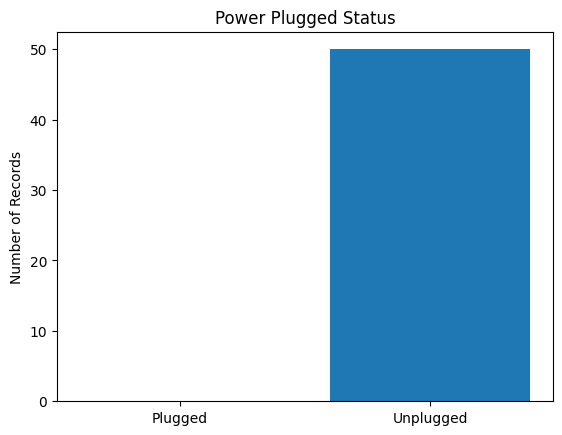

battery_levels - [20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]


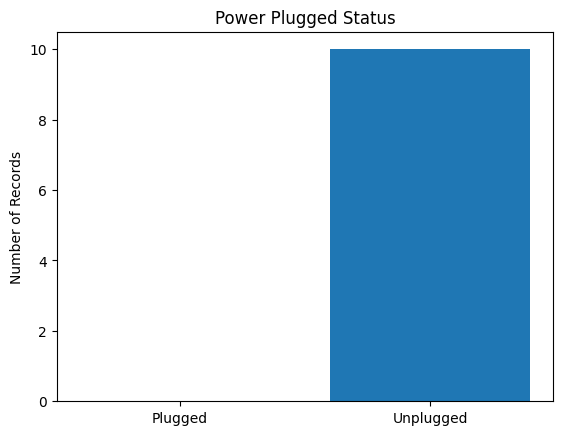

battery_levels - [42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0]


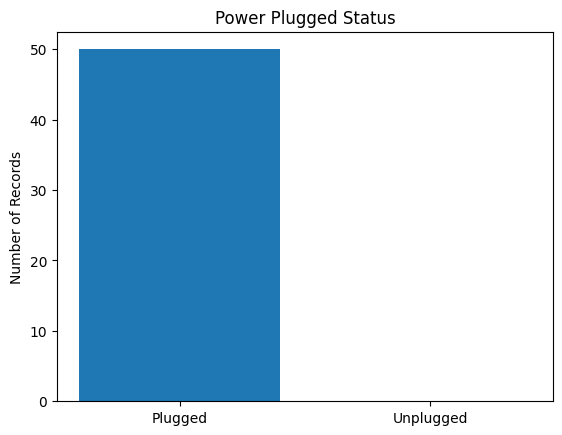

Devices with low battery and unplugged: ['0x8c8590ce32bc']
Delete response: {'status': 'success', 'message': 'Timeseries data deleted'}


In [1]:

import requests
import matplotlib.pyplot as plt
import json
from datetime import datetime 


BASE_URL = "http://localhost:8080" 

def get_all_devices():
    response = requests.get(f"{BASE_URL}/devices")
    response.raise_for_status()
    return response.json()["mac_addresses"]

def get_battery_status(mac_address, start_date, end_date):
    response = requests.get(f"{BASE_URL}/device/{mac_address}", params={"start_date": start_date, "end_date": end_date})
    response.raise_for_status()
    return response.json()

def plot_battery_status(power_plugged):
    
    plugged_counts = sum(1 for record in power_plugged if record == 1.0)
    unplugged_counts = sum(1 for record in power_plugged if record == 0.0)
    plt.bar(['Plugged', 'Unplugged'], [plugged_counts, unplugged_counts])
    plt.ylabel('Number of Records')
    plt.title('Power Plugged Status')
    plt.show()

def get_low_battery_devices():
    response = requests.get(f"{BASE_URL}/devices", params={"blt": 25, "plugged": 0})
    response.raise_for_status()
    return response.json()["mac_addresses"]

def delete_device_data(mac_address):
    response = requests.delete(f"{BASE_URL}/device/{mac_address}")
    response.raise_for_status()
    return response.json()

# Execute the actions
try:
    # a) Retrieve and print the list of all monitored devices
    all_devices = get_all_devices()
    print("All Monitored Devices:", all_devices)

    # b) For each device, retrieve the battery status and plot
    for device in all_devices:
        start_date = datetime.strptime("2024-01-10", "%Y-%m-%d")
        end_date = datetime.strptime("2024-02-03", "%Y-%m-%d")
        battery_data = get_battery_status(device, start_date ,end_date)
        print("battery_levels -",battery_data["battery_levels"])
        power_plugged1 = battery_data["power_plugged"]
        plot_battery_status(power_plugged1)

    # c) Retrieve and print devices with battery <= 25% and unplugged
    low_battery_devices = get_low_battery_devices()
    print("Devices with low battery and unplugged:", low_battery_devices)
   #d) Delete the data of the first device in the list
    if all_devices:
        delete_response = delete_device_data(all_devices[0])
        print("Delete response:", delete_response)

except requests.HTTPError as e:
    print(f"An error occurred: {e}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3de268ea-71d7-469a-8d76-c287e5ad6570' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>